In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/mnt/wd500GB/CSC500/csc500-super-repo/datasets/KRI-16Devices-RawData/14ft/WiFi_air_X310_3123D52_14ft_run1.sigmf-data"
path = "./5_fake_packets.bin"
with open(path, "r+") as f:
    x = np.memmap(f, np.cdouble)

In [3]:
x.shape

(142000,)

/mnt/wd500GB/CSC500/csc500-super-repo/csc500-homenet-experiments/analysis/venv/lib/python3.8/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


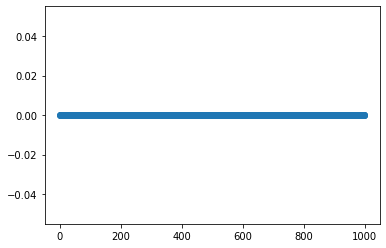

In [4]:
plt.scatter(range(len(x[:1000])), x[:1000],)
plt.show()

In [13]:
# Manual
# window_size = (4,)
# delay_samples = 4

# Auto
sample_rate = 20e6
samples_per_short_training_sequence = int(sample_rate * 0.8e-6)
window_size = (samples_per_short_training_sequence,)
delay_samples = samples_per_short_training_sequence
print("Samples per short training sequence:", samples_per_short_training_sequence)

# Get windowed views into the unchanged Rx, and the delayed Rx
w = np.lib.stride_tricks.sliding_window_view(x, window_size)[delay_samples:]
w_d = np.lib.stride_tricks.sliding_window_view(x[:-delay_samples], window_size)

w_d = np.conjugate(w_d)
c = np.multiply(w, w_d)

c = np.sum(c, axis=1)
c.shape

Samples per short training sequence: 16


(141969,)

In [14]:
p = np.multiply(w, w.conjugate())
p = np.sum(p, axis=1)
p.shape

(141969,)

In [15]:
top = np.multiply(c, c.conjugate())
bottom = np.multiply(p, p)

m = np.divide(top, bottom)
m.shape

/tmp/ipykernel_116339/1017408734.py:4: RuntimeWarning: invalid value encountered in true_divide
  m = np.divide(top, bottom)


(141969,)

/mnt/wd500GB/CSC500/csc500-super-repo/csc500-homenet-experiments/analysis/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


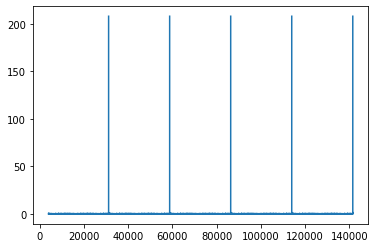

In [16]:
plt.plot(range(len(m)), m)

# r = 5000
# plt.plot(range(r), m[:r])
# plt.scatter(range(r), m[:r], s=0.20)

# Ok I'll do it the hard way

In [18]:
sample_rate = 20e6
samples_per_short_training_sequence = int(sample_rate * 0.8e-6)
window_size = (samples_per_short_training_sequence,)
delay_samples = samples_per_short_training_sequence
print("Samples per short training sequence:", samples_per_short_training_sequence)

Samples per short training sequence: 16


In [24]:
D = samples_per_short_training_sequence
# We lose a bit due to the delay, we could pad the output with zeros to compensate
c = []
for n in range(len(x) - 2*D):
    val = 0+0j
    for k in range(D):
        val += x[n+k] * x[n+k+D].conjugate()
    c.append(val)
c = np.asarray(c, np.cdouble)
    
p = []
for n in range(len(x) - 2*D):
    val = 0+0j
    for k in range(D):
        val += x[n+k+D] * x[n+k+D].conjugate()
    p.append(val)
p = np.asarray(p, np.cdouble)

In [25]:
top = np.multiply(c, c.conjugate())
bottom = np.multiply(p, p)

m = np.divide(top, bottom)
m.shape

/tmp/ipykernel_116339/1017408734.py:4: RuntimeWarning: invalid value encountered in true_divide
  m = np.divide(top, bottom)


(141968,)

/mnt/wd500GB/CSC500/csc500-super-repo/csc500-homenet-experiments/analysis/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


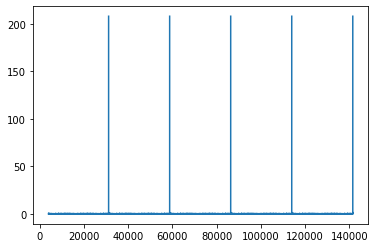

In [26]:
plt.plot(range(len(m)), m)